# Matplotlib Primer
---

Matplotlib is the standard graphics package in Python. The examples below provide an introduction to the different sort of data visualization that can be done using Matplotlib.

Table of Contents:

1. [Import packages](#section1)
2. [Plotting in 2D](#section2)
3. [Plotting in 3D](#section3)

## 1. Import packages <a id='section1'></a>

We import matplotlib along with numpy. Numpy will be used extensively in many of the examples that follow. 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

When working in Jupyter notebook, we also need to tell matplotlib which graphics backend to use. We do this with the line magic as follows. The most common backends are 'inline' for non-interactive plotting, and 'notebook' for interactive plotting.  

In [2]:
# uncomment the following line to use the notebook backend
%matplotlib notebook

# uncomment the following line to use the inline backend
#%matplotlib inline
### NOTE: savefig() does not currently appear to work with inline backend 

There are many others backends available to choose from (gtk, tk, qt, ...). Experiment to find the one that works best for your purposes. (NOTE: changing the graphics backend usually requires restarting the kernel.) You can list the available backends using the following line magic command.

In [3]:
# list available backends
%matplotlib --list

Available matplotlib backends: ['qt5', 'gtk3', 'notebook', 'nbagg', 'inline', 'agg', 'qt', 'gtk', 'wx', 'tk', 'ipympl', 'osx', 'widget', 'qt4']


We will also create an auxiliary directory, which is where output files will be saved to.

In [6]:
# create auxiliary directory
import os
folder = 'matplotlib_files'
if not os.path.exists(folder):
    os.mkdir(folder)

## 2. Plotting in 2D <a id='section2'></a>

### Single curve, single plot

<IPython.core.display.Javascript object>


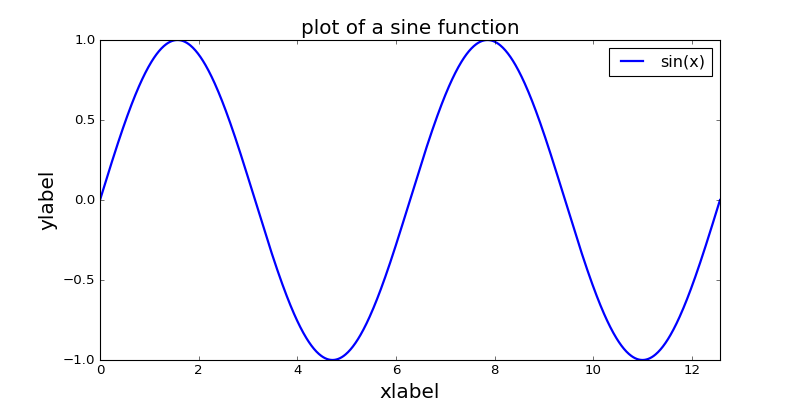

In [20]:
# create xgrid
xmin = 0
xmax = 4*np.pi
xsteps = 1001
x = np.linspace(xmin, xmax, xsteps)

# define a function (dependent variable)
y = np.sin(x)

# plot functions
plt.figure(figsize=(10,5))
plt.plot(x, y, 'b-', linewidth=2, label='sin(x)')
plt.xlim(xmin, xmax)
plt.title('plot of a sine function', fontsize=18)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.legend()

# save to file
file = 'sine.eps'
plt.savefig(folder + '/' + file)

### Multiple curves on the same plot

<IPython.core.display.Javascript object>


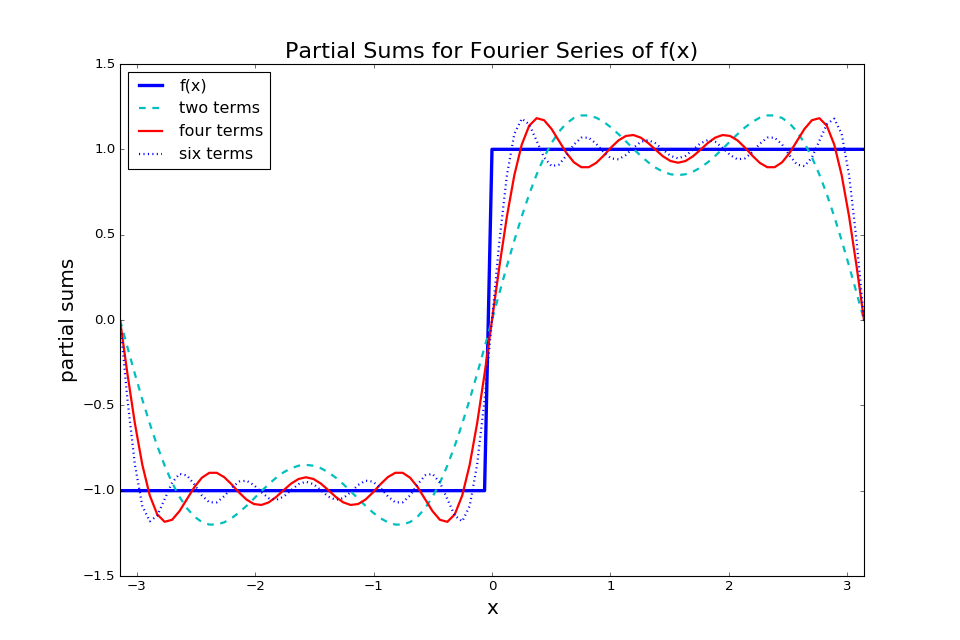

In [21]:
# create xgrid
xmin = -np.pi
xmax = np.pi
xsteps = 101
x = np.linspace(xmin, xmax, 101)

# define a simple step function
f = np.ones_like(x) #initial array of ones, same size as x
f[x<0] = -1         #set values for x<0 to be -1 

# construct partial sums in Fourier sine series
y1 = (4/np.pi)*(np.sin(x) + np.sin(3*x)/3.0)
y2 = y1 + (4/np.pi)*(np.sin(5*x)/5.0 + np.sin(7*x)/7.0)
y3 = y2 + (4/np.pi)*(np.sin(9*x)/9.0 + np.sin(11*x)/11.0)

# plot multiple curves on a single figure
plt.figure(figsize=(12,8))
plt.plot(x, f, 'b-', lw=3, label='f(x)')
plt.plot(x, y1, 'c--', lw=2, label='two terms')
plt.plot(x, y2, 'r-', lw=2, label='four terms')
plt.plot(x, y3, 'b:', lw=2, label='six terms')
plt.xlim(xmin, xmax)
plt.xlabel('x', fontsize=18)
plt.ylabel('partial sums', fontsize=18)
plt.title('Partial Sums for Fourier Series of f(x)', fontsize=20)
plt.legend(loc='best')

# save to file
file = 'multicurve.eps'
plt.savefig(folder + '/' + file)

### An array of plots

<IPython.core.display.Javascript object>


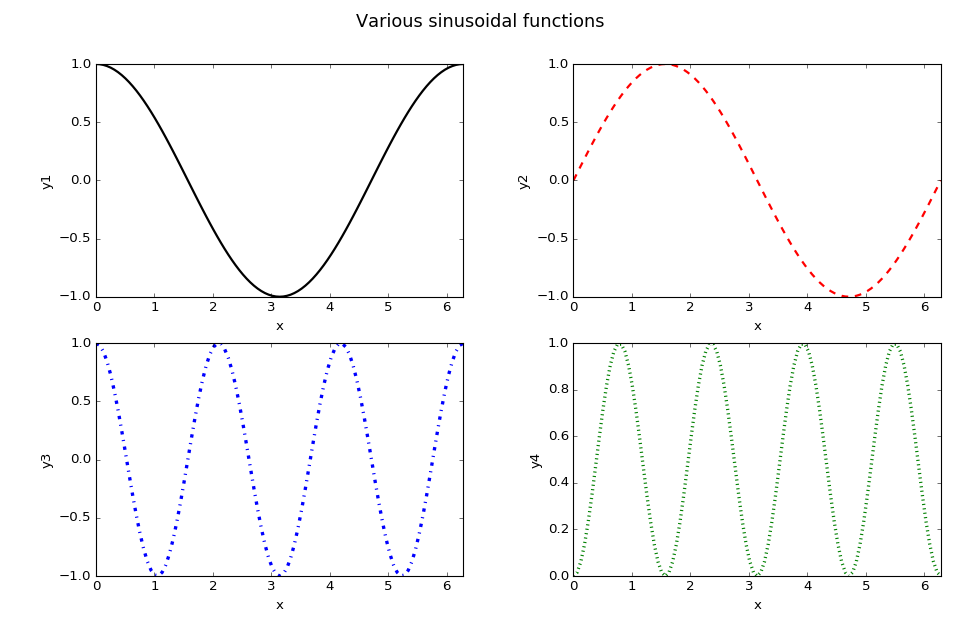

In [22]:
# create xgrid
xmin= 0
xmax=2*np.pi
xsteps = 101
x = np.linspace(xmin, xmax, xsteps)

# define some functions
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.cos(3*x)
y4 = np.sin(2*x)**2

# make a figure with multiple subplots
fig = plt.figure(figsize=(12,8))
fig.suptitle('Various sinusoidal functions', size=16)
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.9, hspace=0.2, wspace=0.3)

# plot function 1 on its own subplot
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, y1, color='black', linestyle='-', linewidth=2)
ax1.set_xlim(xmin, xmax)
ax1.set_xlabel('x',size=12)
ax1.set_ylabel('y1',size=12)

# plot function 2 on its own subplot
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x, y2, color='red', linestyle='--', linewidth=2)
ax2.set_xlim(xmin, xmax)
ax2.set_xlabel('x',size=12)
ax2.set_ylabel('y2',size=12)

# plot function 3 on its own subplot
ax3 = fig.add_subplot(2,2,3)
ax3.plot(x, y3, color='blue', linestyle='-.', linewidth=3)
ax3.set_xlim(xmin, xmax)
ax3.set_xlabel('x',size=12)
ax3.set_ylabel('y3',size=12)

# plot function 4 on its own subplot
ax4 = fig.add_subplot(2,2,4)
ax4.plot(x, y4, color='green', linestyle=':', linewidth=3)
ax4.set_xlim(xmin, xmax)
ax4.set_xlabel('x',size=12)
ax4.set_ylabel('y4',size=12)

# save to file
file = 'multiplot.eps'
plt.savefig(folder + '/' + file)

### Customized linestyles

<IPython.core.display.Javascript object>


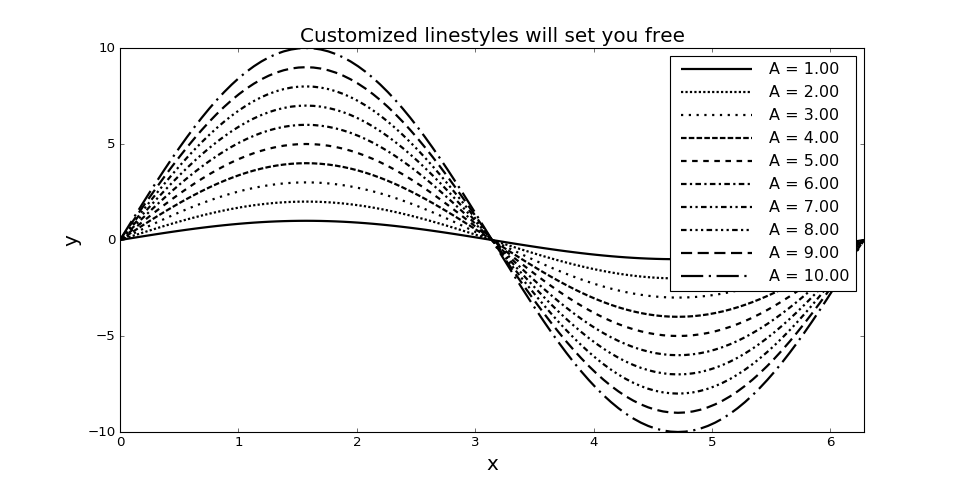

In [23]:
# create xgrid
xmin= 0
xmax=2*np.pi
xsteps = 101
x = np.linspace(xmin, xmax, xsteps)

# amplitudes
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# plot multiple curves with customized linestyles
# use ls=(offset, onoffseq), where onoffseq=(on, off, on, off, ...)
plt.figure(figsize=(12,6))
plt.plot(x, A[0]*np.sin(x), 'k', ls=(0,()), lw=2, label='A = %.2f' % A[0])
plt.plot(x, A[1]*np.sin(x), 'k', ls=(0,(2, 2)), lw=2, label='A = %.2f' % A[1])
plt.plot(x, A[2]*np.sin(x), 'k', ls=(0,(2, 5)), lw=2, label='A = %.2f' % A[2])
plt.plot(x, A[3]*np.sin(x), 'k', ls=(0,(5, 2)), lw=2, label='A = %.2f' % A[3])
plt.plot(x, A[4]*np.sin(x), 'k', ls=(0,(5, 5)), lw=2, label='A = %.2f' % A[4])
plt.plot(x, A[5]*np.sin(x), 'k', ls=(0,(5, 3, 2, 3)), lw=2, label='A = %.2f' % A[5])
plt.plot(x, A[6]*np.sin(x), 'k', ls=(0,(5, 3, 2, 3, 2, 3)), lw=2, label='A = %.2f' % A[6])
plt.plot(x, A[7]*np.sin(x), 'k', ls=(0,(5, 3, 2, 3, 2, 3, 2, 3)), lw=2, label='A = %.2f' % A[7])
plt.plot(x, A[8]*np.sin(x), 'k', ls=(0,(10, 5)), lw=2, label='A = %.2f' % A[8])
plt.plot(x, A[9]*np.sin(x), 'k', ls=(0,(20, 5, 2, 5)), lw=2, label='A = %.2f' % A[9])
plt.xlim(xmin, xmax)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('Customized linestyles will set you free', fontsize=18)
plt.legend(loc='upper right', handlelength=5)

# save to file
file = 'linestyles.eps'
plt.savefig(folder + '/' + file)

### Polar plot

<IPython.core.display.Javascript object>


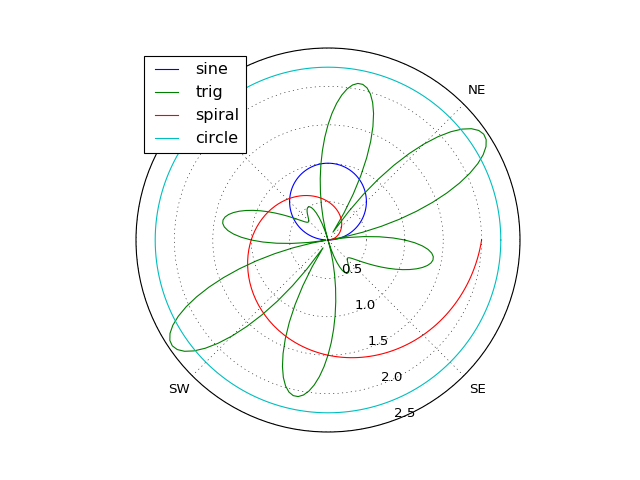

In [24]:
# create theta grid
theta = np.linspace(0,2*np.pi,201)

# define some polar functions
r1 = np.sin(theta)
r2 = np.abs(np.cos(5.0*theta) - 1.5*np.sin(3.0*theta))
r3 = theta/np.pi
r4 = 2.25*np.ones_like(theta)

# plot
plt.polar(theta,r1,label='sine')
plt.polar(theta,r2,label='trig')
plt.polar(theta,r3,label='spiral')
plt.polar(theta,r4,label='circle')
plt.thetagrids(np.arange(45,360,90),('NE','NW','SW','SE'))
plt.rgrids((0.5, 1.0, 1.5, 2.0, 2.5), angle=290)
plt.legend(loc='best')

# save to file
file = 'polar.eps'
plt.savefig(folder + '/' + file)

### Contour plot

<IPython.core.display.Javascript object>


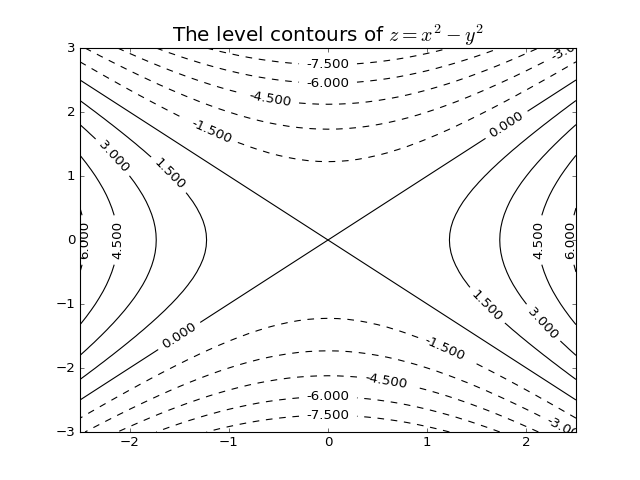

In [25]:
# create mesh grid
[X,Y] = np.mgrid[-2.5:2.5:51j, -3:3:61j]
Z = X*X - Y*Y

# plot
curves = plt.contour(X,Y,Z, 12, colors='k')
plt.clabel(curves)
plt.title(r'The level contours of $z=x^2-y^2$',size=18)

# save to file
file = 'contour.eps'
plt.savefig(folder + '/' + file)

### Filled contour plot

<IPython.core.display.Javascript object>


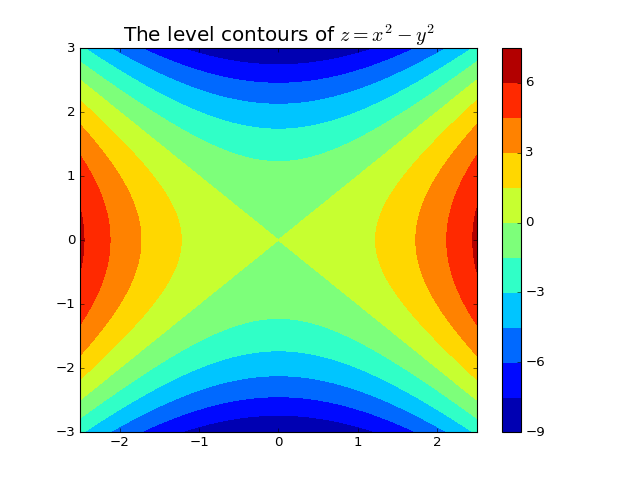

In [26]:
# create mesh grid
[X,Y] = np.mgrid[-2.5:2.5:51j, -3:3:61j]
Z = X*X - Y*Y

# plot
curves = plt.contourf(X,Y,Z, 12)
plt.colorbar()
plt.title(r'The level contours of $z=x^2-y^2$',size=18)

# save to file
file = 'contour_filled.eps'
plt.savefig(folder + '/' + file)

## 3. Plotting in 3D <a id='section3'></a>

For 3D graphics, it is necessary to load the following package.

In [27]:
from mpl_toolkits.mplot3d import Axes3D

### Surface plots

In [28]:
# create 1D grids (independent variables) 
X = np.arange(-5, 5, 1.)
Y = np.arange(-5, 5, 1.)

In [29]:
X

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [30]:
Y

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [31]:
# create mesh grid
Y, X = np.meshgrid(X, Y)

In [32]:
X

array([[-5., -5., -5., -5., -5., -5., -5., -5., -5., -5.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-3., -3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.]])

In [33]:
Y

array([[-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]])

In [34]:
# define a grid function
R = np.sqrt(X*X + Y*Y)
Z = np.sin(R)
Z

array([[ 0.70886129,  0.11965158, -0.43697552, -0.7820949 , -0.92618484,
        -0.95892427, -0.92618484, -0.7820949 , -0.43697552,  0.11965158],
       [ 0.11965158, -0.58617619, -0.95892427, -0.9712778 , -0.83133918,
        -0.7568025 , -0.83133918, -0.9712778 , -0.95892427, -0.58617619],
       [-0.43697552, -0.95892427, -0.89168225, -0.44749175, -0.02068353,
         0.14112001, -0.02068353, -0.44749175, -0.89168225, -0.95892427],
       [-0.7820949 , -0.9712778 , -0.44749175,  0.30807174,  0.78674913,
         0.90929743,  0.78674913,  0.30807174, -0.44749175, -0.9712778 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913, -0.02068353, -0.83133918],
       [-0.95892427, -0.7568025 ,  0.14112001,  0.90929743,  0.84147098,
         0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913

<IPython.core.display.Javascript object>


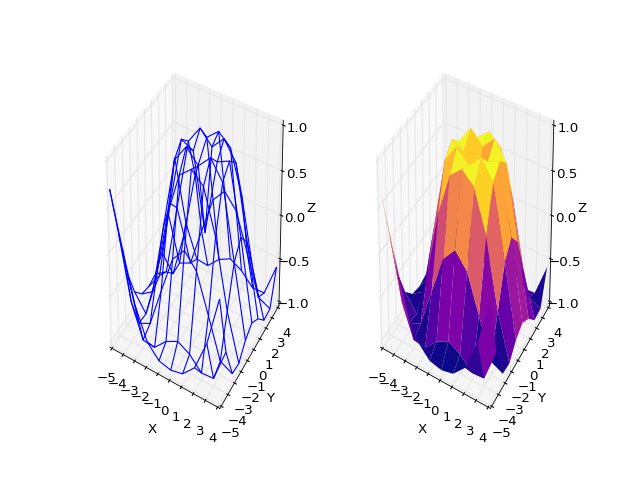

In [35]:
#plot grid function as 2D surface

# create figure
fig = plt.figure()

# wireframe
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, Z, linewidth=1, rstride=1, cstride=1)
ax1.set_zlim(-1.01, 1.01)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# colormap
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='plasma', linewidth=0, rstride=1, cstride=1)
ax2.set_zlim(-1.01, 1.01)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# save to file
file = 'surface2D.eps'
plt.savefig(folder + '/' + file)

### 3D curve

<IPython.core.display.Javascript object>


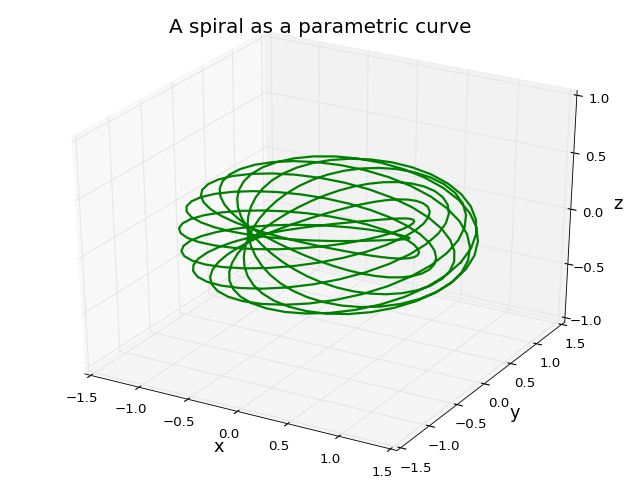

In [36]:
# define theta grid
theta = np.linspace(0, 2*np.pi, 401)

# define a parametric curve
a = 0.3
m = 11.0
n = 9.0
x = (1 + a*np.cos(n*theta))*np.cos(m*theta)
y = (1 + a*np.cos(n*theta))*np.sin(m*theta)
z = a*np.sin(n*theta)

# plot with mplot3d (via matplotlib)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z, 'g', lw=2)
ax.set_zlim3d(-1.0, 1.0)
ax.set_xlabel('x', size=16)
ax.set_ylabel('y', size=16)
ax.set_zlabel('z', size=16)
ax.set_title('A spiral as a parametric curve', size=18)

# save to file
file = 'curve3D.pdf'
plt.savefig(folder + '/' + file)